           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  yr_renovated  zipcode      lat  \
0      5650     1.0           0     0  ...             0    98178  47.5112   
1      7242     2.0           0     0  ...          1991    98125  47.7210   
2     10000     1.0           0     0  ...             0    98028  47.7379   
3      5000     1.0           0     0  ...             0    98136  47.5208   
4      8080     1.0           0     0  ...             0    98074  47.6168   

      long  sqft_living15  sqft_lot15  income   schools  hospi

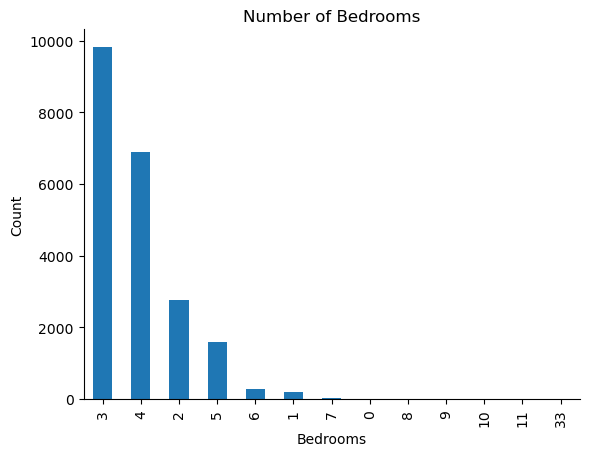

<Figure size 1000x1000 with 0 Axes>

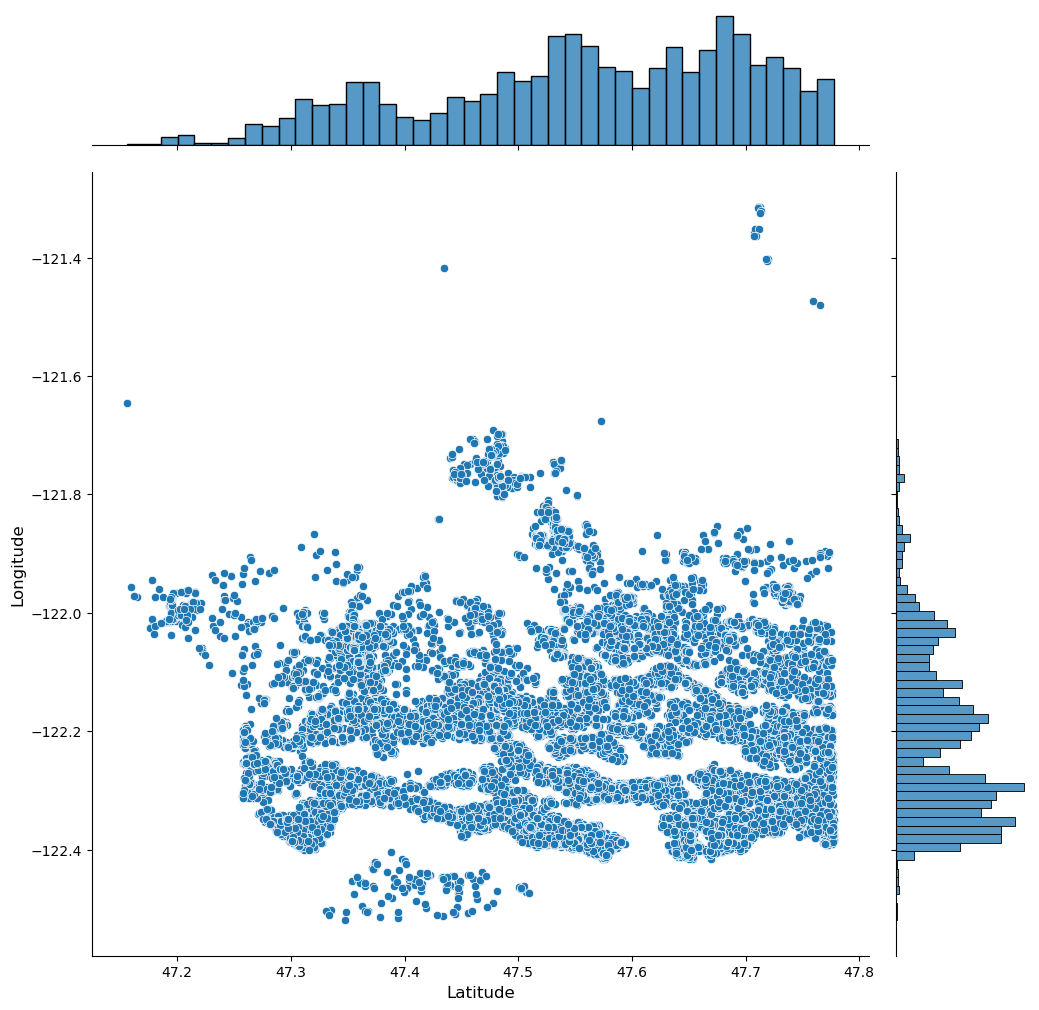

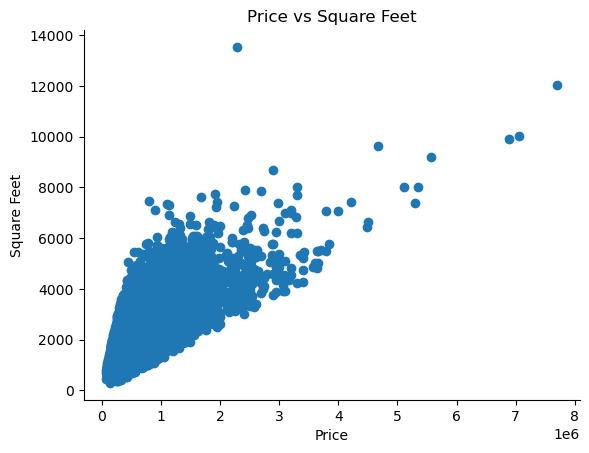

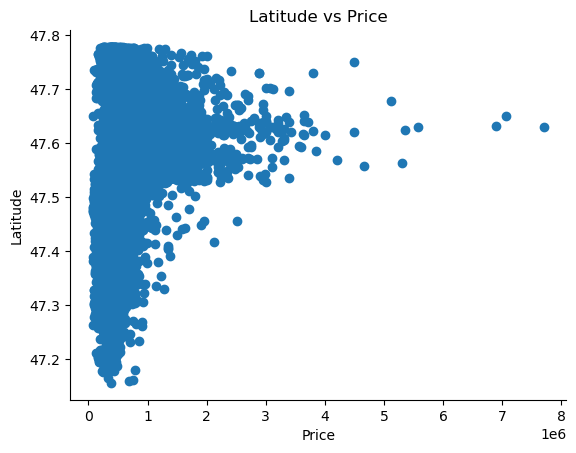

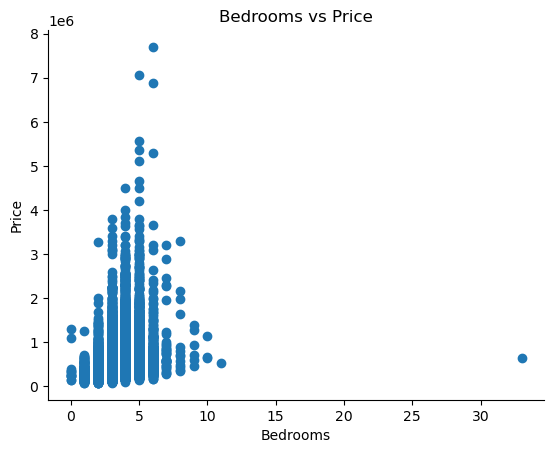

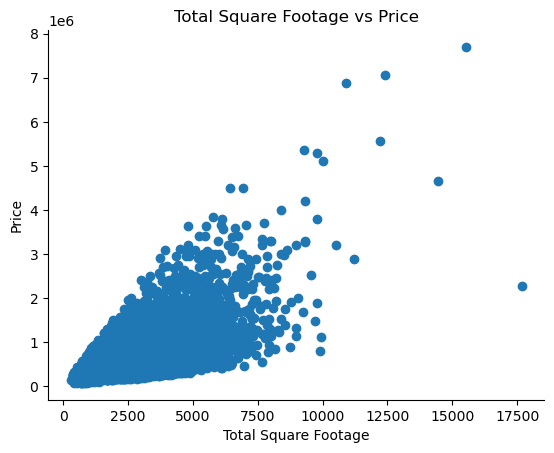

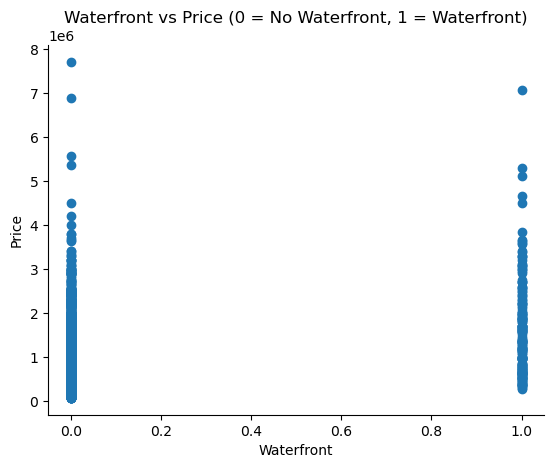

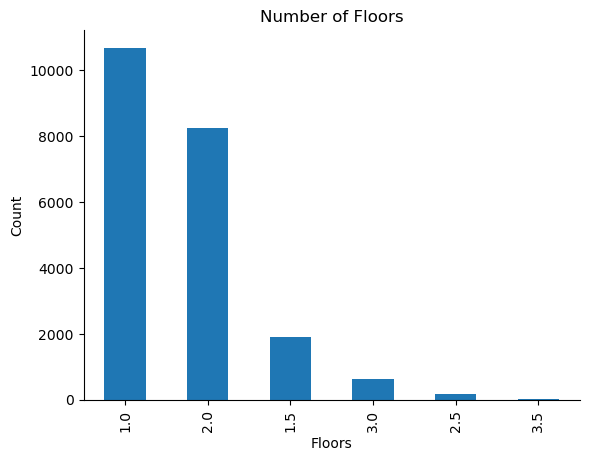

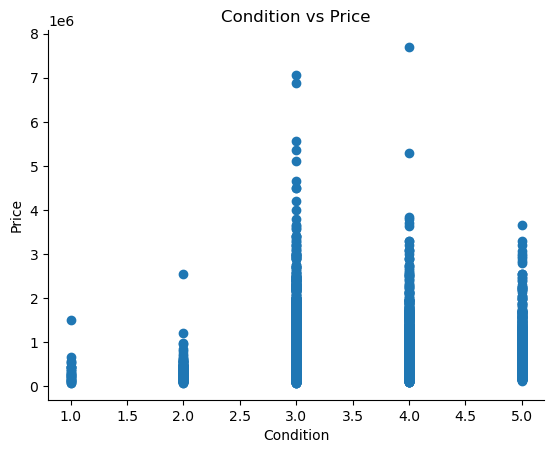

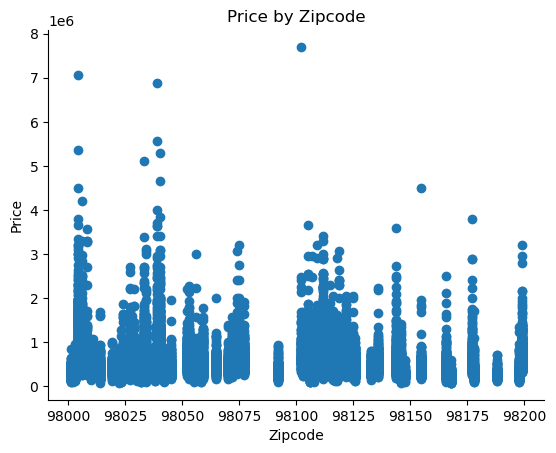

XGBoost Test Score: 0.9063630530072457
Mean Squared Error: 13682732761.73263
PCA Explained Variance Ratios: [2.27382060e-01 9.57914238e-02 8.02344211e-02 5.94659840e-02
 5.24885795e-02 4.48108796e-02 4.41044961e-02 4.36060973e-02
 4.33493185e-02 4.31522603e-02 4.25654833e-02 3.75753632e-02
 3.60323952e-02 2.85462557e-02 2.60315556e-02 2.16677752e-02
 1.75785795e-02 1.41212872e-02 1.24012582e-02 1.10017808e-02
 9.82765667e-03 8.26508979e-03 1.15334119e-32]


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import xgboost as xgb

# Ensure inline plotting
%matplotlib inline

# Load the dataset
data = pd.read_csv("kc_house_data.csv")

# Simulating additional features (Income, Schools, Hospitals, Crime Rates)
np.random.seed(0)  # For reproducibility
data['income'] = np.random.randint(30000, 150000, size=len(data))  # Random income values
data['schools'] = np.random.uniform(0, 10, size=len(data))  # Simulated schools rating (0-10 scale)
data['hospitals'] = np.random.uniform(0, 10, size=len(data))  # Simulated proximity to hospitals (0-10 scale)
data['crime_rate'] = np.random.uniform(0, 10, size=len(data))  # Simulated crime rates (0-10 scale)

# Display first few rows to check new columns
print(data.head())

# Summary statistics
print(data.describe())

# Bedrooms distribution
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine()
plt.show()

# Latitude vs Longitude joint plot
plt.figure(figsize=(10, 10))
sns.jointplot(x=data.lat.values, y=data.long.values, height=10)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Longitude', fontsize=12)
plt.show()

# Price vs Square Feet
plt.scatter(data.price, data.sqft_living)
plt.title("Price vs Square Feet")
plt.xlabel("Price")
plt.ylabel("Square Feet")
sns.despine()
plt.show()

# Latitude vs Price
plt.scatter(data.price, data.lat)
plt.title("Latitude vs Price")
plt.xlabel("Price")
plt.ylabel("Latitude")
sns.despine()
plt.show()

# Bedrooms vs Price
plt.scatter(data.bedrooms, data.price)
plt.title("Bedrooms vs Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
sns.despine()
plt.show()

# Square footage (living + basement) vs Price
plt.scatter((data['sqft_living'] + data['sqft_basement']), data['price'])
plt.title("Total Square Footage vs Price")
plt.xlabel("Total Square Footage")
plt.ylabel("Price")
sns.despine()
plt.show()

# Waterfront vs Price
plt.scatter(data.waterfront, data.price)
plt.title("Waterfront vs Price (0 = No Waterfront, 1 = Waterfront)")
plt.xlabel("Waterfront")
plt.ylabel("Price")
sns.despine()
plt.show()

# Floors distribution
data.floors.value_counts().plot(kind='bar')
plt.title("Number of Floors")
plt.xlabel("Floors")
plt.ylabel("Count")
sns.despine()
plt.show()

# Price by condition
plt.scatter(data.condition, data.price)
plt.title("Condition vs Price")
plt.xlabel("Condition")
plt.ylabel("Price")
sns.despine()
plt.show()

# Price by zipcode
plt.scatter(data.zipcode, data.price)
plt.title("Price by Zipcode")
plt.xlabel("Zipcode")
plt.ylabel("Price")
sns.despine()
plt.show()

# Data preprocessing
labels = data['price']
data['date'] = [1 if '2014' in date else 0 for date in data['date']]
train_data = data.drop(['id', 'price'], axis=1)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(train_data, labels, test_size=0.1, random_state=2)

# XGBoost Model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                          max_depth = 5, alpha = 10, n_estimators = 100)

xg_reg.fit(x_train, y_train)

# Predicting and evaluating the model
preds = xg_reg.predict(x_test)
print("XGBoost Test Score:", xg_reg.score(x_test, y_test))
print("Mean Squared Error:", mean_squared_error(y_test, preds))

# PCA for dimensionality reduction
pca = PCA()
pca_data = pca.fit_transform(scale(train_data))
print("PCA Explained Variance Ratios:", pca.explained_variance_ratio_)
